In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv(r'UScomments.csv', error_bad_lines=False)
df.head()

C:\Users\SATYAM\AppData\Local\Temp\ipykernel_11284\1000854607.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'UScomments.csv', error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\SATYAM\AppData\Local\Temp\ipykernel_11284\1000854607.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'UScomments.csv', error_bad_lines=False)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [44]:
df.shape

(691400, 4)

In [45]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [46]:
df.dropna(inplace=True)
# Clean values if some values are missing

In [47]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Sentiment Analysis
Analyzing the sentiments of the user

In [48]:
from textblob import TextBlob

In [49]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [50]:
sample_df = df[0:1000]

In [51]:
sample_df.shape

(1000, 4)

In [52]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [53]:
len(polarity)

691375

In [54]:
df['polarity'] = polarity

In [55]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Wordcloud Analysis

Graphical representation of Text frequent words

In [56]:
filter1 = df['polarity']==1

In [57]:
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [58]:
filter1 = df['polarity'] == 1

In [59]:
comments_positive = df[filter1]

In [60]:
comments_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [61]:
filter2 = df['polarity'] == -1

In [62]:
comments_negative = df[filter2]

In [63]:
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [64]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS are used to make meaningless that helps to does not any affect of these words
like is, are, am, to, the, as, up

In [65]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [66]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [67]:
type(df['comment_text'])

pandas.core.series.Series

In [68]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [69]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

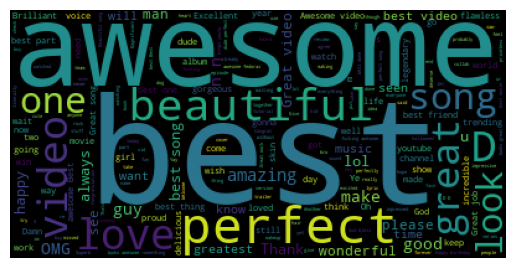

In [70]:
plt.imshow(wordcloud)
plt.axis('off')

In [71]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [72]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

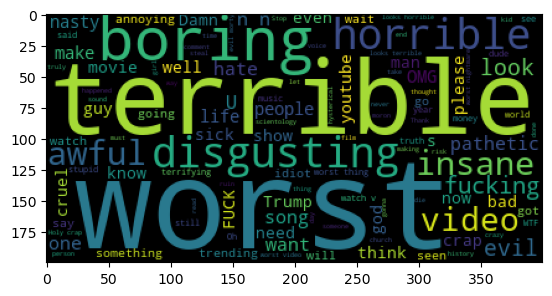

In [73]:
plt.imshow(wordcloud)
plt.axis()

# Emoji Analysis

In [74]:
import emoji

In [75]:
emoji.__version__

'2.7.0'

In [76]:
df['comment_text'].head(7)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
Name: comment_text, dtype: object

In [77]:
comment = 'trending 😉'     


[char for char in comment if char in emoji.EMOJI_DATA]


## This is also doing the same work. The upper one is list comprehension and the another one is using normal loop
# emoji_list = []
# for char in comment:
#     if char in emoji.EMOJI_DATA:
#         emoji_list.append(char)

# emoji_list

['😉']

In [78]:
all_emojis_list = []

for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [79]:
all_emojis_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [80]:
all_emojis_list[0:15]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈', '😂', '🔥']

In [81]:
from collections import Counter

In [82]:
Counter(all_emojis_list)

Counter({'😂': 36987,
         '😍': 33453,
         '❤': 31119,
         '🔥': 8694,
         '😭': 8398,
         '👏': 5719,
         '😘': 5545,
         '👍': 5476,
         '💖': 5359,
         '💕': 5147,
         '♥': 4909,
         '😊': 3596,
         '🏻': 3438,
         '💜': 3429,
         '😬': 3381,
         '👌': 3112,
         '💙': 2831,
         '😢': 2672,
         '🏼': 2549,
         '🤣': 2279,
         '🙌': 2233,
         '😁': 2220,
         '💗': 2144,
         '😱': 2094,
         '🙏': 1818,
         '🌍': 1810,
         '😀': 1734,
         '💛': 1677,
         '🏽': 1593,
         '🤔': 1592,
         '💓': 1540,
         '😄': 1496,
         '😩': 1472,
         '💯': 1450,
         '💞': 1420,
         '😻': 1409,
         '😎': 1358,
         '💚': 1295,
         '😃': 1235,
         '😮': 1232,
         '🏾': 1205,
         '☺': 1180,
         '😆': 1149,
         '🐍': 1143,
         '😅': 1070,
         '😙': 1067,
         '💿': 1031,
         '😉': 998,
         '💋': 968,
         '💀': 926,


In [83]:
Counter(all_emojis_list).most_common()

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279),
 ('🙌', 2233),
 ('😁', 2220),
 ('💗', 2144),
 ('😱', 2094),
 ('🙏', 1818),
 ('🌍', 1810),
 ('😀', 1734),
 ('💛', 1677),
 ('🏽', 1593),
 ('🤔', 1592),
 ('💓', 1540),
 ('😄', 1496),
 ('😩', 1472),
 ('💯', 1450),
 ('💞', 1420),
 ('😻', 1409),
 ('😎', 1358),
 ('💚', 1295),
 ('😃', 1235),
 ('😮', 1232),
 ('🏾', 1205),
 ('☺', 1180),
 ('😆', 1149),
 ('🐍', 1143),
 ('😅', 1070),
 ('😙', 1067),
 ('💿', 1031),
 ('😉', 998),
 ('💋', 968),
 ('💀', 926),
 ('💩', 925),
 ('🎶', 906),
 ('🤗', 896),
 ('✨', 889),
 ('🖕', 884),
 ('✌', 835),
 ('🔴', 824),
 ('🖤', 784),
 ('🔵', 759),
 ('😥', 742),
 ('🎃', 739),
 ('💘', 702),
 ('😫', 692),
 ('💪', 687),
 ('🎉', 684),
 ('👑', 678),
 ('👎', 673),
 ('😐', 644),
 ('😇', 640),
 ('😒', 629),
 ('💵', 628),
 ('🙄', 627),
 ('😏', 623),
 

In [84]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [85]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [86]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [87]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [88]:
Counter(all_emojis_list).most_common(10)[5][0]

'👏'

In [89]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [90]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [91]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [92]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [93]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [94]:
trace = go.Bar(x=emojis, y=freqs)

In [95]:
iplot([trace])

In [100]:
import os

In [126]:
files = os.listdir("C:/Users/SATYAM/Downloads/")
files

['(LP Requirement Elicitation Questionnaire (5).xlsx',
 '.ipynb_checkpoints',
 '09283479-df96-47ae-b141-7db9684fe99a.pdf',
 '0bdea0c0592c5f6517e2e0547d2d9033.jpg',
 '0eea136fea51239e6e432bf1024c8fc1.pdf',
 '10. Char Arrays.pdf',
 '10.21105.joss.03895.pdf',
 '11. Pointers - Apni kaksha.pdf',
 '12 .DMA - Apni Kaksha .pdf',
 '13 (1).pdf',
 '13.1 StringChallenges.pdf',
 '13.pdf',
 '1338362.png',
 '1562_data.zip',
 '160235-chart-template-16x9.pptx',
 '1637132031_white-oak-official-chillhop-music-wallpaper.zip',
 '1689911398313-certificate.png',
 '1690432981973-certificate.png',
 '1st installment_fee_Report.pdf',
 '202063_Sample.pdf',
 '202118_Sample_report[1].docx',
 '202118_Satyam.docx',
 '202118_Satyam.pdf',
 '202118_SatyamArya.docx',
 '202118_SatyamArya.pdf',
 '211_assignment_Surabhi.pdf',
 '28d7ddde-a9ab-47a6-9521-fc7105b716db.pdf',
 '2nd installment_fee_Report.pdf',
 '3rd installment_fee_Report.pdf',
 '4 Pattern Questions.pdf',
 '5. Binary Number System & Question Practice.pdf',
 '6.2 

In [127]:
[file for file in files if '.csv' in file]

['annual-enterprise-survey-2021-financial-year-provisional-csv.csv',
 'business-price-indexes-june-2023-quarter-csv.csv',
 'car_data.csv',
 'data.csv',
 'economic-survey-of-manufacturing-march-2023-quarter-csv.csv',
 'FiveYearData.csv',
 'machine-readable-business-employment-data-mar-2023-quarter.csv',
 'research-and-development-survey-2022-csv-notes.csv',
 'UScomments.csv',
 'wholesale-trade-survey-march-2023-quarter-csv.csv']

In [125]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')